In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Illustris Alignments

In [97]:
from Illustris_Shapes.simulation_props import sim_prop_dict

simname = 'TNG300-1'
snapnum = 99
shape_type = 'iterative'

d = sim_prop_dict[simname]
Lbox = d['Lbox']

## open catalogs

In [98]:
from astropy.table import Table

# load VAGC
fpath = '/Users/duncan/Projects/' + 'Illustris_Shapes/data/value_added_catalogs/'
fname = simname + '_' + str(snapnum) + '_vagc.dat'
vagc_galaxy_table = Table.read(fpath + fname, format='ascii')

# load shape catalog
fpath = '/Users/duncan/Projects/' + 'Illustris_Shapes/data/shape_catalogs/'
fname = simname + '_' + str(snapnum) + '_' + shape_type + '_galaxy_shapes.dat'
galaxy_shape_table = Table.read(fpath + fname, format='ascii')

from astropy.table import join
galaxy_table = join(vagc_galaxy_table, galaxy_shape_table)

## Shape Correlartions

In [99]:
from halotools.mock_observables.alignments import ee_3d, ed_3d

In [100]:
coords = np.vstack((galaxy_table['x'],
                    galaxy_table['y'],
                    galaxy_table['z'])).T/1000.0

# major_axis
orientations_major = np.vstack((galaxy_table['av_x'],
                                galaxy_table['av_y'],
                                galaxy_table['av_z'])).T

# major_axis
orientations_minor = np.vstack((galaxy_table['cv_x'],
                                galaxy_table['cv_y'],
                                galaxy_table['cv_z'])).T

In [117]:
rbins = np.logspace(-1,1.3,20)
rbin_centers = (rbins[:-1]+rbins[1:])/2.0

mask = galaxy_table['stellar_mass_all']>10**10.5
print(np.sum(mask))

24433


In [ ]:
result_1 = ee_3d(coords[mask], orientations_major[mask], coords[mask], orientations_major[mask], rbins, period=Lbox)

result_2 = ed_3d(coords[mask], orientations_major[mask], coords[mask], rbins, period=Lbox)

In [118]:
result_1 = ee_3d(coords[mask], orientations_minor[mask], coords[mask], orientations_minor[mask], rbins, period=Lbox)

result_2 = ed_3d(coords[mask], orientations_minor[mask], coords[mask], rbins, period=Lbox)

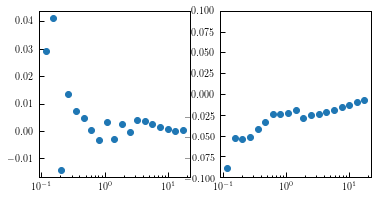

In [119]:
fig, axes = plt.subplots(1,2, sharex = False, sharey = False, figsize=(6.6,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)

ax=axes[0]
ax.plot(rbin_centers, result_1, 'o')
ax.set_xscale('log')
#ax.set_ylim([-0.01,0.01])

ax=axes[1]
ax.plot(rbin_centers, result_2, 'o')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim([-0.1,0.1])


plt.show()